In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
data = pd.read_csv('lisk_checker.csv')
data

,time,open,high,low,close,Volume,Volume MA
0,2020-01-02T08:30:00+09:00,21.6800,21.6800,21.5200,21.5600,NaN,NaN
1,2020-01-02T09:30:00+09:00,21.5100,21.5600,21.4000,21.5600,NaN,NaN
2,2020-01-02T10:30:00+09:00,21.6000,21.6000,21.4700,21.5200,NaN,NaN
3,2020-01-02T11:30:00+09:00,21.5000,21.5100,21.4200,21.4600,NaN,NaN
4,2020-01-02T12:30:00+09:00,21.4400,21.4400,21.3500,21.4300,NaN,NaN
...,...,...,...,...,...,...,...
21630,2023-11-09T11:30:00+09:00,1.7429,1.7584,1.7429,1.7429,NaN,NaN
21631,2023-11-09T12:30:00+09:00,1.7429,1.7598,1.7429,1.7584,NaN,NaN
21632,2023-11-09T13:30:00+09:00,1.7549,1.7584,1.7429,1.7584,NaN,NaN
21633,2023-11-09T14:30:00+09:00,1.7575,1.7595,1.7533,1.7533,NaN,NaN


In [187]:
data.drop(['Volume','Volume MA','time'],axis=1,inplace=True)

In [188]:
data

,open,high,low,close
0,21.6800,21.6800,21.5200,21.5600
1,21.5100,21.5600,21.4000,21.5600
2,21.6000,21.6000,21.4700,21.5200
3,21.5000,21.5100,21.4200,21.4600
4,21.4400,21.4400,21.3500,21.4300
...,...,...,...,...
21630,1.7429,1.7584,1.7429,1.7429
21631,1.7429,1.7598,1.7429,1.7584
21632,1.7549,1.7584,1.7429,1.7584
21633,1.7575,1.7595,1.7533,1.7533


In [189]:
training_size = int(len(data)*0.80)                              
data_len = len(data)                                            
train, test = data[0:training_size],data[training_size:data_len]

In [190]:
from sklearn.preprocessing import StandardScaler


In [191]:
scaler = StandardScaler()    
scaler2 = StandardScaler()   
train = scaler.fit_transform(train)  
test = scaler.fit_transform(test) 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

In [192]:
x_train = train[:,0:3]
y_train = train[:,3]
x_test = test[:,0:3]
y_test = test[:,3]

In [193]:
x_train[60:100,:3]

array([[0.16731292, 0.15728843, 0.14562566],
       [0.13827412, 0.13322749, 0.13445199],
       [0.13478947, 0.1274987 , 0.13680434],
       [0.13711257, 0.12520718, 0.13151155],
       [0.12491627, 0.11489535, 0.12269023],
       [0.11388153, 0.10916655, 0.12210214],
       [0.11504308, 0.11145807, 0.11974979],
       [0.11504308, 0.10343776, 0.12563067],
       [0.11794696, 0.10916655, 0.12621876],
       [0.11271998, 0.102292  , 0.11622126],
       [0.10923532, 0.09770896, 0.11092847],
       [0.10110446, 0.09599032, 0.11151656],
       [0.10749299, 0.09599032, 0.10916421],
       [0.10284678, 0.09255305, 0.11151656],
       [0.10226601, 0.10458352, 0.11269274],
       [0.1144623 , 0.1051564 , 0.11504509],
       [0.11852774, 0.11088519, 0.11563318],
       [0.10807377, 0.10114624, 0.11092847],
       [0.11155842, 0.11145807, 0.12151405],
       [0.12085084, 0.10916655, 0.12269023],
       [0.11736618, 0.10973943, 0.12563067],
       [0.11794696, 0.11031231, 0.12269023],
       [0.

In [194]:
timesteps = 60
X_train_ = []
y_train_ = []
X_test_ = []
y_test_ = []
for i in range(timesteps, x_train.shape[0]):
    X_train_.append(x_train[i-timesteps:i, :3])
    y_train_.append(y_train[i])

X_train_ = np.array(X_train_)
y_train_ = np.array(y_train_)
for i in range(timesteps, x_test.shape[0]):
    X_test_.append(x_test[i-timesteps:i, :3])
    y_test_.append(y_test[i])

X_test_ = np.array(X_test_)
y_test_ = np.array(y_test_)
print("X_train_ shape:", X_train_.shape)
print("y_train_ shape:", y_train_.shape)
print("X_test_ shape:", X_test_.shape)
print("y_test_ shape:", y_test_.shape)

X_train_ shape: (17248, 60, 3)
y_train_ shape: (17248,)
X_test_ shape: (4267, 60, 3)
y_test_ shape: (4267,)


In [218]:
y_test_.shape

(4267,)

In [195]:
X_train_.shape

(17248, 60, 3)

In [196]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [197]:
regressor = Sequential()
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(X_train_.shape[1],X_train_.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [198]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")
early_stop = EarlyStopping(monitor='loss', patience=5)        # 5번 체크 
checkpoint = ModelCheckpoint('lst_checkpoint.h5', monitor='loss', save_best_only=True, mode='auto') 


In [199]:
epochs = 100 
batch_size = 20
regressor.fit(X_train_, y_train_, epochs = epochs, batch_size = batch_size,                   # 자료나눔 25% , 알림 활성화
                  callbacks=[early_stop,checkpoint])  

Epoch 1/100
863/863 [==============================] - 19s 19ms/step - loss: 0.1894
Epoch 2/100
 10/863 [..............................] - ETA: 16s - loss: 0.1028

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


863/863 [==============================] - 17s 19ms/step - loss: 0.0575
Epoch 3/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0501
Epoch 4/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0397
Epoch 5/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0367
Epoch 6/100
863/863 [==============================] - 16s 19ms/step - loss: 0.0329
Epoch 7/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0424
Epoch 8/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0388
Epoch 9/100
863/863 [==============================] - 16s 18ms/step - loss: 0.0276
Epoch 10/100
863/863 [==============================] - 16s 19ms/step - loss: 0.0278
Epoch 11/100
863/863 [==============================] - 16s 19ms/step - loss: 0.0248
Epoch 12/100
863/863 [==============================] - 17s 19ms/step - loss: 0.0226
Epoch 13/100
863/863 [==============================] - 16s 19ms/step - loss: 0.0210


In [200]:
pred=regressor.predict(X_test_)

134/134 [==============================] - 1s 8ms/step


In [207]:
pred.shape

(4267, 1)

In [202]:
pred2 = np.tile(pred,(1,4))  

In [222]:
pred2.shape

(4267, 4)

In [223]:
ans = scaler.inverse_transform(pred2)  

In [210]:
ans =ans[:,0]

In [212]:
real_price =real_price[:,0]

(1,)

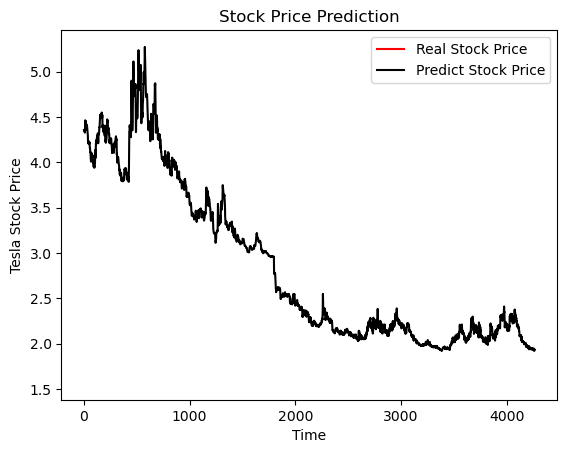

In [213]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(ans, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()